# Grouping Similar FSPS Spectra

Using python-fsps documentation and examples: http://dan.iel.fm/python-fsps/current/stellarpop_api/#example

In [1]:
# imports and plotting setup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import fsps
from astroML.plotting import setup_text_plots

np.set_printoptions(suppress=True)
setup_text_plots(fontsize=24)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('font', size=24, family='serif', style='normal', variant='normal', stretch='normal', weight='bold')
mpl.rc('legend', labelspacing=0.1, handlelength=2, fontsize=13)
mpl.rc('axes', labelweight='black')

### Effect of sigma_smooth

In [3]:
sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=1,  zmet=20, \
        dust_type=2, dust2=0.2, sf_start=1., tau=5.)
wave, spec = sp.get_spectrum(tage=12.5, peraa=True) 
sp.params['sigma_smooth'] = 250.
wave, spec2 = sp.get_spectrum(tage=12.5, peraa=True) 

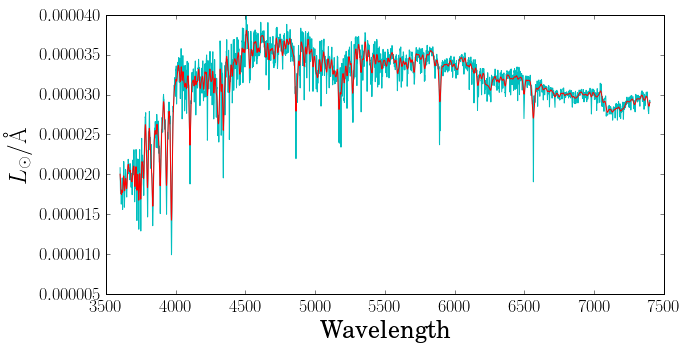

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
wh = (wave < 7400.) * (wave > 3600.)
ax.plot(wave[wh], spec[wh], 'c')
ax.plot(wave[wh], spec2[wh], 'r')
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')

In [5]:
np.sum(wh)

4220

Ok, so the MILES library is higher resolution and only has decent data between ~3525 and 7500A.

In [44]:
A = 12.5 # time since the galaxy we're observing started forming stars
sf_begin = 13.7 - A # Gyr after big bang

tau_grid = np.array([1., 4., 8.]) #1e2 is max allowed
age_grid = A - tau_grid * ( (1. - (A/tau_grid + 1.) * np.exp(-A/tau_grid)) / \
                             (1. - np.exp(-A/tau_grid)) ) # mean ages given taus

### Let's see what changing $\tau$ does...

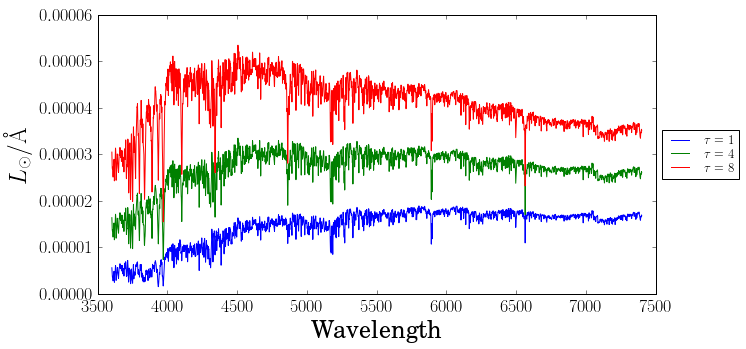

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')

for tau in tau_grid:
    sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=1,  zmet=20, \
            dust_type=2, dust2=0.2, sf_start=1., tau=tau)
    wave, spec = sp.get_spectrum(tage=12.5, peraa=True) 
    wh = (wave < 7400.) * (wave > 3600.)
    ax.plot(wave[wh], spec[wh], label=r'$\tau=%d$' % tau)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Let's see what changing zmet does...

I assume the metallicity is held constant at all times when computing the CSP?

In [59]:
log_zsol_grid = [-1.50, -0.98, -0.49, 0]
zmet_grid = [5, 10, 15, 20]

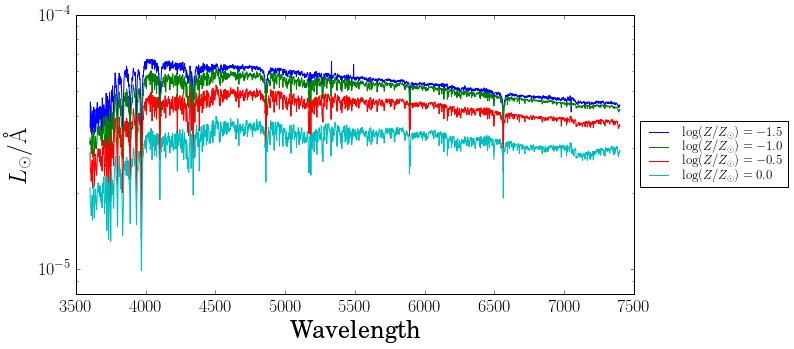

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')
plt.yscale('log')
plt.ylim([8e-6,1e-4])

for zz in range(len(zmet_grid)):
    sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=1,  zmet=zmet_grid[zz], \
            dust_type=2, dust2=0.2, sf_start=1., tau=5., add_neb_emission=False)
    wave, spec = sp.get_spectrum(tage=12.5, peraa=True) 
    wh = (wave < 7400.) * (wave > 3600.)
    ax.plot(wave[wh], spec[wh], label=r'$\log (Z/Z_\odot)=%.1f$' % log_zsol_grid[zz])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [65]:
sp.params['tau'], sp.params['const'], sp.params['sf_start'], sp.params['sf_trunc'], \
sp.params['tburst'], sp.params['fburst']

(5.0, 0.0, 1.0, 0.0, 11.0, 0.0)

### Let's see what changing dust2 does...

In [66]:
dust_grid = [0, 0.2, 0.4, 0.6, 1.0]

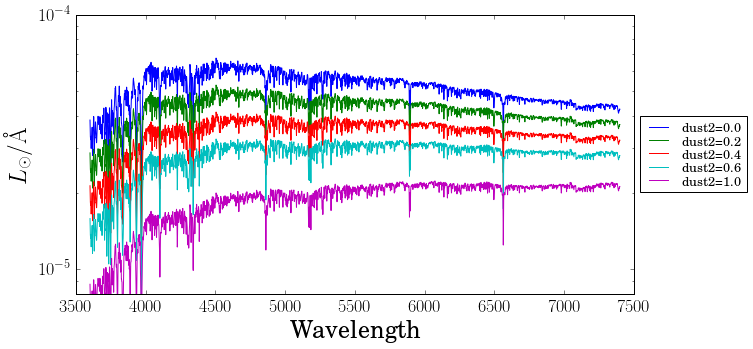

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')
plt.yscale('log')
plt.ylim([8e-6,1e-4])

for dust2 in dust_grid:
    sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=1,  zmet=15, \
            dust_type=2, dust2=dust2, sf_start=1., tau=5., add_neb_emission=False)
    wave, spec = sp.get_spectrum(tage=12.5, peraa=True) 
    wh = (wave < 7400.) * (wave > 3600.)
    ax.plot(wave[wh], spec[wh], label=r'dust2=%.1f' % dust2)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Let's see what changing dust type does...

In [79]:
atten_grid = [0, 1, 2, 4]
atten_labels = ['Pow', 'CCM', 'Cal', 'KC']

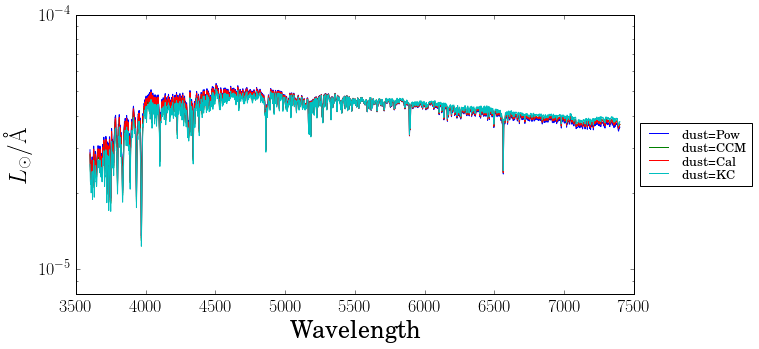

In [80]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')
plt.yscale('log')
plt.ylim([8e-6,1e-4])

for dd in range(len(atten_grid)):
    sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=1,  zmet=15, \
            dust_type=atten_grid[dd], dust2=0.2, sf_start=1., tau=5., add_neb_emission=False)
    wave, spec = sp.get_spectrum(tage=12.5, peraa=True) 
    wh = (wave < 7400.) * (wave > 3600.)
    ax.plot(wave[wh], spec[wh], label=r'dust=%s' % atten_labels[dd])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Let's see what changing IMF type does...

In [72]:
imf_grid = [0, 1, 2, 3, 4]
imf_labels = ['Salp', 'Chab', 'Krou', 'vanD', 'Dave']

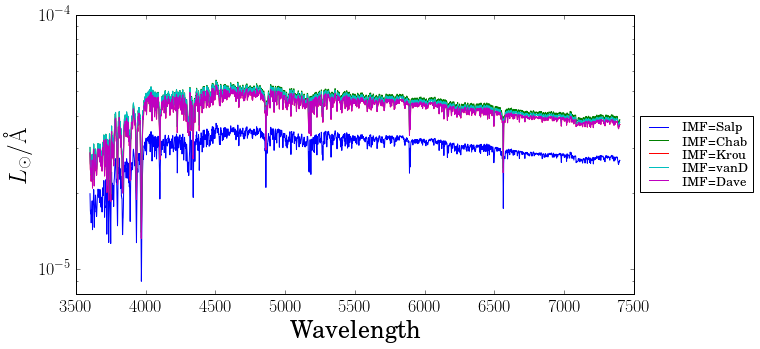

In [76]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')
plt.yscale('log')
plt.ylim([8e-6,1e-4])

for ii in range(len(imf_grid)):
    sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=1,  zmet=15, \
            dust_type=2, dust2=0.2, sf_start=1., tau=5., add_neb_emission=False, imf_type=imf_grid[ii])
    wave, spec = sp.get_spectrum(tage=12.5, peraa=True) 
    wh = (wave < 7400.) * (wave > 3600.)
    ax.plot(wave[wh], spec[wh], label=r'IMF=%s' % imf_labels[ii])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

So basically anything but Salpeter is fine and doesn't affect things much...

In [85]:
sp.params['dust_index'], sp.params['mwr'], sp.params['uvb'], sp.params['dust1'], sp.params['dust2']

(-0.7, 3.1, 1.0, 0.0, 0.2)

In [89]:
sp.params['sigma_smooth']

0.0

### Thinking more about what the parameters of this CSP mean, and whether they're realistic...

sfh=1: Defines the type of star formation history, normalized such that one solar mass of stars is formed over the full SFH. 1: A six parameter SFH (tau model plus a constant component and a burst), with parameters
tau, const, sf_start, sf_trunc, tburst, and fburst
  * so no stars in this model are formed in either constant SF mode or burst mode

dust_type=2: Calzetti et al. (2000) attenuation curve. Note that if this value is set then the dust attenuation is applied to all starlight equally (not split by age), and therefore the only relevant parameter is dust2, which sets the overall normalization.

sf_start=1.0: start time of the SFH in Gyr

**tage**: compute the spectra and magnitudes only at this age, and will therefore only output one age result. The units are Gyr. **but the age of what? the universe, or the stellar population? I assume the latter...**

Ok. Next steps:
  * make a grid of ~3 steps in 5 different parameters that appreciably change the optical spectrum
  * try PCA or a distance matrix/LLE type approach to see if spectra cluster naturally
  * what are "typical observational errors"? should emission lines be included or masked?
  * keep reading fsps docs/playing with parameters to better understand what's happening

## Test: Building grid of 5 steps in 3 parameters (125 spectra)

In [2]:
# set up grids in tau, metallicity, and dust

A = 12.5 # time since the galaxy we're observing started forming stars
sf_begin = 13.7 - A # Gyr after big bang

tau_grid = np.array([1., 4., 8., 12., 100.]) #1e2 is max allowed
age_grid = A - tau_grid * ( (1. - (A/tau_grid + 1.) * np.exp(-A/tau_grid)) / \
                             (1. - np.exp(-A/tau_grid)) ) # mean ages given taus

log_zsol_grid = [-1.50, -0.98, -0.49, 0, 0.2]
zmet_grid = [5, 10, 15, 20, 22]

dust_grid = [0, 0.2, 0.4, 0.6, 1.0]

In [3]:
spectra = np.zeros((5, 5, 5, 4220))

for tt in range(len(tau_grid)):
    for zz in range(len(zmet_grid)):
        for dd in range(len(dust_grid)):
            sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=1,  zmet=zmet_grid[zz], \
                    dust_type=2, dust2=dust_grid[dd], sf_start=1., tau=tau_grid[tt], add_neb_emission=False, \
                    sigma_smooth=250.)
            wave, spec = sp.get_spectrum(tage=12.5, peraa=True)
            wh = (wave < 7400.) * (wave > 3600.)
            spectra[tt, zz, dd, :] = spec[wh]

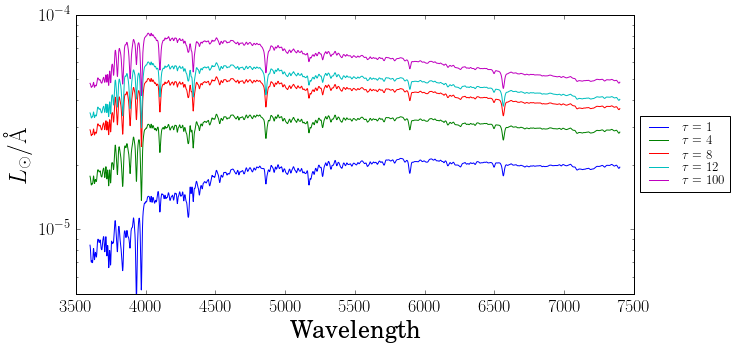

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')
plt.yscale('log')
plt.ylim([5e-6,1e-4])

for ii in range(5):
    meanspec = np.mean(spectra[ii,:,:,:], axis=(0,1))
    ax.plot(wave[wh], meanspec, label=r'$\tau=%d$' % tau_grid[ii])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [5]:
specmatrix = spectra.reshape((125,4220))

taus = [tau_grid[0]] * 25 + [tau_grid[1]] * 25 + [tau_grid[2]] * 25 + [tau_grid[3]] * 25 + [tau_grid[4]] * 25

zs = [log_zsol_grid[0]] * 5 + [log_zsol_grid[1]] * 5 + [log_zsol_grid[2]] * 5 + [log_zsol_grid[3]] * 5 \
    + [log_zsol_grid[4]] * 5
zs *= 5

dusts = dust_grid * 25

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(specmatrix)

PCA(copy=True, n_components=5, whiten=False)

In [7]:
pca.explained_variance_ratio_

array([ 0.99458633,  0.00445532,  0.0007441 ,  0.00012369,  0.00003882])

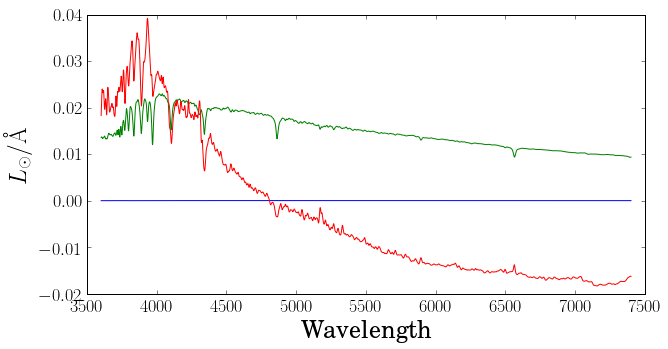

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')
plt.yscale('linear')
#plt.ylim([5e-6,1e-4])
ax.plot(wave[wh], pca.mean_)
ax.plot(wave[wh], pca.components_[0])
ax.plot(wave[wh], pca.components_[1])
#ax.plot(wave[wh], pca.components_[2])
#ax.plot(wave[wh], pca.components_[3])
#ax.plot(wave[wh], pca.components_[4])

In [9]:
trans = pca.transform(specmatrix)

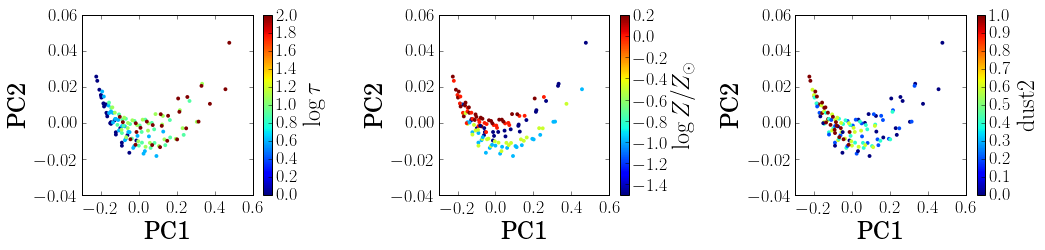

In [10]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
hm = ax[0].scatter(trans[:,0]*100, trans[:,1]*100, c=np.log10(np.array(taus)), s=15, lw=0)
plt.colorbar(hm, label=r'$\log \tau$', ax=ax[0])

ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
hm = ax[1].scatter(trans[:,0]*100, trans[:,1]*100, c=np.array(zs), s=15, lw=0)
plt.colorbar(hm, label=r'$\log Z/Z_\odot$', ax=ax[1])

ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC2')
hm = ax[2].scatter(trans[:,0]*100, trans[:,1]*100, c=np.array(dusts), s=15, lw=0)
plt.colorbar(hm, label=r'$\mathrm{dust2}$', ax=ax[2])

plt.tight_layout()

### Now try some manifold learning methods

In [11]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=50, n_components=2)
iso.fit(specmatrix)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_neighbors=50,
    neighbors_algorithm='auto', path_method='auto', tol=0)

In [12]:
tr = iso.transform(specmatrix)

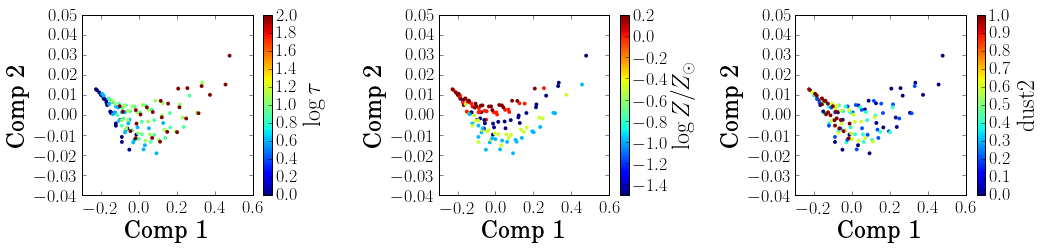

In [13]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

ax[0].set_xlabel('Comp 1')
ax[0].set_ylabel('Comp 2')
hm = ax[0].scatter(tr[:,0]*100, tr[:,1]*100, c=np.log10(np.array(taus)), s=15, lw=0)
plt.colorbar(hm, label=r'$\log \tau$', ax=ax[0])

ax[1].set_xlabel('Comp 1')
ax[1].set_ylabel('Comp 2')
hm = ax[1].scatter(tr[:,0]*100, tr[:,1]*100, c=np.array(zs), s=15, lw=0)
plt.colorbar(hm, label=r'$\log Z/Z_\odot$', ax=ax[1])

ax[2].set_xlabel('Comp 1')
ax[2].set_ylabel('Comp 2')
hm = ax[2].scatter(tr[:,0]*100, tr[:,1]*100, c=np.array(dusts), s=15, lw=0)
plt.colorbar(hm, label=r'$\mathrm{dust2}$', ax=ax[2])

plt.tight_layout()

### Try clustering!

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(specmatrix)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [15]:
tr = km.predict(specmatrix)

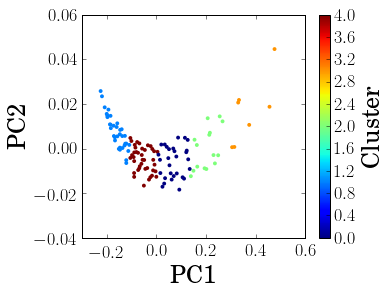

In [16]:
fig, ax = plt.subplots(figsize=(5,4))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
hm = ax.scatter(trans[:,0]*100, trans[:,1]*100, c=tr, s=15, lw=0)
plt.colorbar(hm, label='Cluster', ax=ax)

### Try computing the euclidean distance matrix and see if anything interesting comes of that...

In [17]:
from scipy.spatial.distance import pdist, squareform
dist = pdist(specmatrix, metric='euclidean') # this is a "condensed distance matrix"
distmatrix = squareform(dist)

In [18]:
testind = 85
test = distmatrix[testind,:]
print taus[testind], zs[testind], dusts[testind]

12.0 -0.49 0


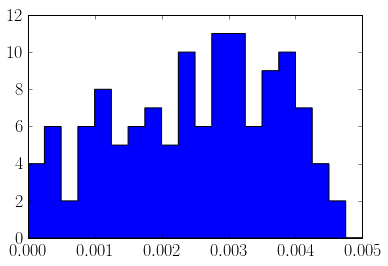

In [36]:
dist_bins = np.linspace(0.0, 0.005, 21)
n, bins, patches = plt.hist(test, bins=dist_bins, histtype='stepfilled')

In [72]:
test.shape

(125,)

In [73]:
wh1 = np.where(test < 0.002)
wh2 = np.where(test < 0.0005)
np.shape(wh1), np.shape(wh2)

((1, 44), (1, 10))

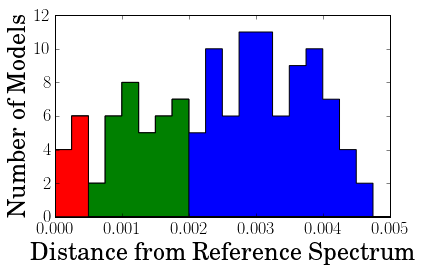

In [85]:
dist_bins = np.linspace(0.0, 0.005, 21)
n, bins, patches = plt.hist(test, bins=dist_bins, histtype='stepfilled')
n, bins, patches = plt.hist(test[wh1], bins=dist_bins, histtype='stepfilled')
n, bins, patches = plt.hist(test[wh2], bins=dist_bins, histtype='stepfilled')
plt.xlabel('Distance from Reference Spectrum')
plt.ylabel('Number of Models')
plt.subplots_adjust(bottom=0.2)
plt.savefig('model_distances.png')

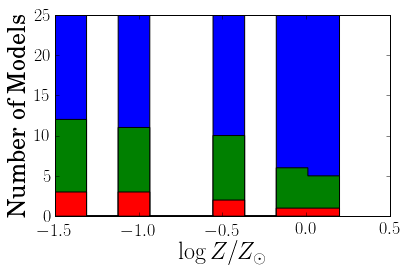

In [86]:
z_bins = np.linspace(-1.5, 0.2, 10)

n, bins, patches = plt.hist(zs, bins=z_bins, histtype='stepfilled')
n, bins, patches = plt.hist(np.array(zs)[wh1], bins=z_bins, histtype='stepfilled')
n, bins, patches = plt.hist(np.array(zs)[wh2], bins=z_bins, histtype='stepfilled')
plt.xlabel(r'$\log Z/Z_\odot$')
plt.ylabel('Number of Models')
plt.subplots_adjust(bottom=0.2)
plt.savefig('model_zs.png')

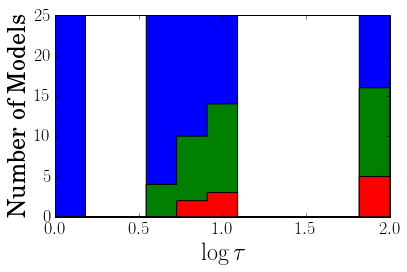

In [87]:
tau_bins = np.linspace(0,2,12)

n, bins, patches = plt.hist(np.log10(taus), bins=tau_bins, histtype='stepfilled')
n, bins, patches = plt.hist(np.log10(np.array(taus)[wh1]), bins=tau_bins, histtype='stepfilled')
n, bins, patches = plt.hist(np.log10(np.array(taus)[wh2]), bins=tau_bins, histtype='stepfilled')
plt.xlabel(r'$\log \tau$')
plt.ylabel('Number of Models')
plt.subplots_adjust(bottom=0.2)
plt.savefig('model_taus.png')

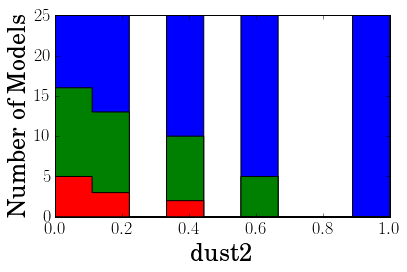

In [88]:
dust_bins = np.linspace(0,1,10)

n, bins, patches = plt.hist(dusts, bins=dust_bins, histtype='stepfilled')
n, bins, patches = plt.hist(np.array(dusts)[wh1], bins=dust_bins, histtype='stepfilled')
n, bins, patches = plt.hist(np.array(dusts)[wh2], bins=dust_bins, histtype='stepfilled')
plt.xlabel('dust2')
plt.ylabel('Number of Models')
plt.subplots_adjust(bottom=0.2)
plt.savefig('model_dusts.png')

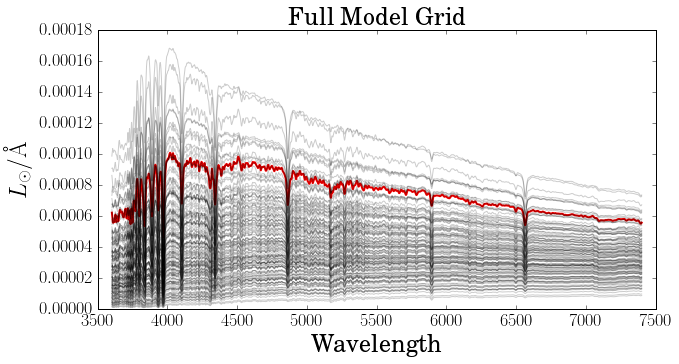

In [78]:
wh = (wave < 7400.) * (wave > 3600.)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')
ax.set_title('Full Model Grid')

ax.plot(wave[wh], specmatrix[testind], 'r-', linewidth=2)
#for ii in range(np.shape(wh2)[1]):
#    plt.plot(wave[wh], specmatrix[wh2[0][ii]], 'k-', alpha=0.2)

for ii in range(np.shape(specmatrix)[0]):
    ax.plot(wave[wh], specmatrix[ii], 'k-', alpha=0.2)
plt.savefig('all_model_spectra.png')

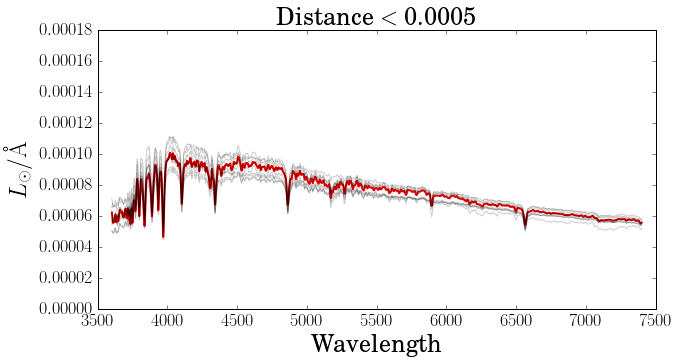

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')
ax.set_title(r'Distance $<$ 0.0005')
ax.set_ylim([0,0.00018])

ax.plot(wave[wh], specmatrix[testind], 'r-', linewidth=2)
for ii in range(np.shape(wh2)[1]):
    plt.plot(wave[wh], specmatrix[wh2[0][ii]], 'k-', alpha=0.2)
plt.savefig('nearby_spectra.png')

#### Takeaway from this exploration:
Even restricting to pretty small distances between spectra allows for some nontrivial variation in dust content, SFH, and metallicity...

BUT -- this range of distances might not be reasonable at all. Particular features tell us more about certain model parameters -- the depths of some of the lines are obviously inconsistent for some of the 'nearby' models above. Then again, continuum fits do sometimes result in fits that look wrong at this level, especially when a lot of regions are masked...

To do next:
  * explore more what exactly PC1 and PC2 are -- compare prediction from just these to actual spectrum
  * try color coding PC scatter plots by distance from a given model spectrum
  * try comparing these models to an actual SDSS spectrum. How do obs errors compare to distances between models?

## New Idea: try taking out the overall spectral shape and looking for informative features

100.0 0.6 -1.5


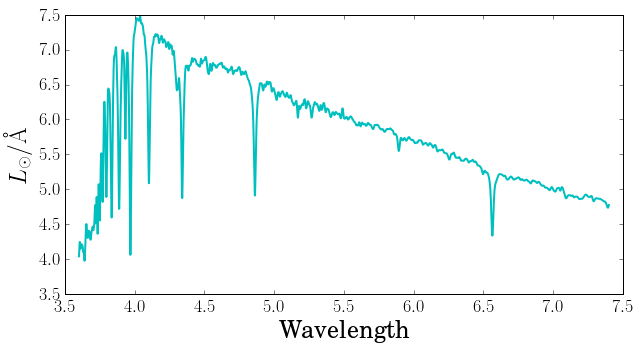

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')

ax.plot(wave[wh]/1e3, specmatrix[103]*1e5, 'c-', linewidth=2)
print taus[103], dusts[103], zs[103]

In [7]:
specind = 0
x = wave[wh]/1e3
y = specmatrix.T * 1e5
deg = 6
test = np.polyfit(x, y, deg=deg)

In [8]:
test.shape

(7, 125)

In [9]:
model = np.zeros(y.shape)

for ii in range(model.shape[1]):
    for jj in range(deg+1):
        model[:,ii] += test[jj,ii] * x**(deg - jj)

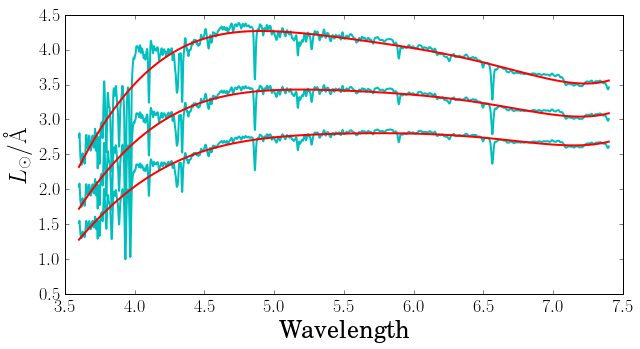

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')

ax.plot(x, y[:,0:3], 'c-', linewidth=2)
ax.plot(x, model[:,0:3], 'r-', linewidth=2)

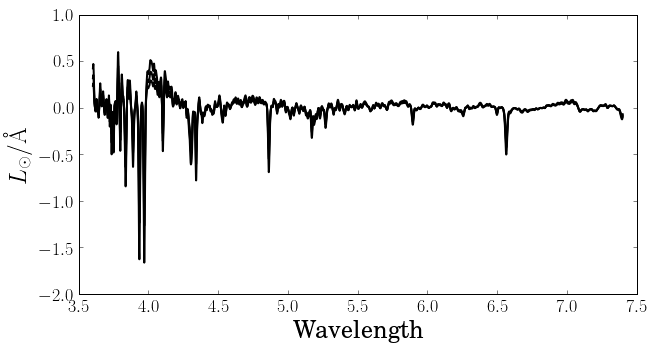

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength')
ax.set_ylabel(r'$L_\odot/\mathrm{\AA}$')

ax.plot(x, y[:,0:3] - model[:,0:3], 'k-', linewidth=2)

In [12]:
feature_matrix = (y - model).T

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(feature_matrix)

PCA(copy=True, n_components=5, whiten=False)

In [13]:
trans = pca.transform(feature_matrix)
pca.explained_variance_ratio_

array([ 0.87963385,  0.08868064,  0.01997975,  0.00567733,  0.00356517])

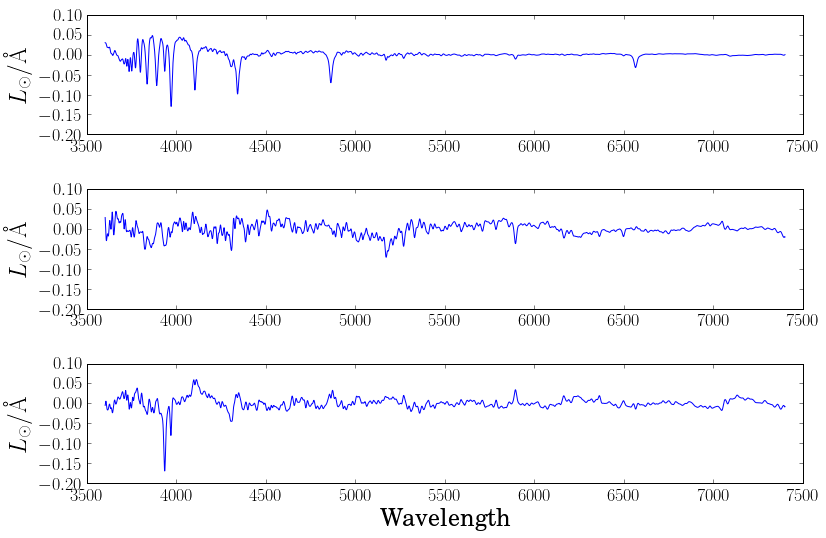

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(12,8), sharey=True)
ax[2].set_xlabel('Wavelength')
ax[0].set_ylabel(r'$L_\odot/\mathrm{\AA}$')
ax[1].set_ylabel(r'$L_\odot/\mathrm{\AA}$')
ax[2].set_ylabel(r'$L_\odot/\mathrm{\AA}$')

ax[0].plot(wave[wh], pca.components_[0])
ax[1].plot(wave[wh], pca.components_[1])
ax[2].plot(wave[wh], pca.components_[2])
#ax.plot(wave[wh], pca.components_[3])
#ax.plot(wave[wh], pca.components_[4])
plt.tight_layout()

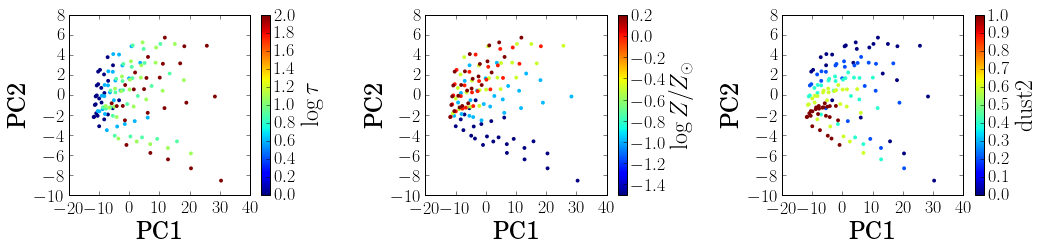

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
hm = ax[0].scatter(trans[:,0], trans[:,1], c=np.log10(np.array(taus)), s=15, lw=0)
plt.colorbar(hm, label=r'$\log \tau$', ax=ax[0])

ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
hm = ax[1].scatter(trans[:,0], trans[:,1], c=np.array(zs), s=15, lw=0)
plt.colorbar(hm, label=r'$\log Z/Z_\odot$', ax=ax[1])

ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC2')
hm = ax[2].scatter(trans[:,0], trans[:,1], c=np.array(dusts), s=15, lw=0)
plt.colorbar(hm, label=r'$\mathrm{dust2}$', ax=ax[2])

plt.tight_layout()

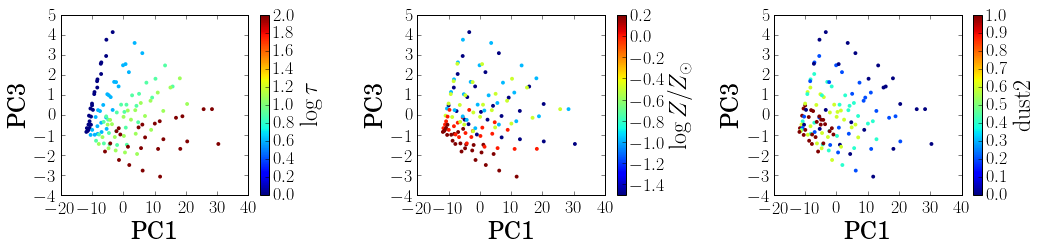

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC3')
hm = ax[0].scatter(trans[:,0], trans[:,2], c=np.log10(np.array(taus)), s=15, lw=0)
plt.colorbar(hm, label=r'$\log \tau$', ax=ax[0])

ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')
hm = ax[1].scatter(trans[:,0], trans[:,2], c=np.array(zs), s=15, lw=0)
plt.colorbar(hm, label=r'$\log Z/Z_\odot$', ax=ax[1])

ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC3')
hm = ax[2].scatter(trans[:,0], trans[:,2], c=np.array(dusts), s=15, lw=0)
plt.colorbar(hm, label=r'$\mathrm{dust2}$', ax=ax[2])

plt.tight_layout()

Next: 
  * try k-means -- do the different types of models cluster in 3-5 dimensions?
  * try the original PCA again but this time on normalized spectra
  * read Yip paper to compare how they identified "informative" spectral regions

## Now, look at variance as a function of wavelength for normalized model spectra

In [46]:
# normalize the model spectra
norms = np.sum(wh) / np.sum(specmatrix, axis=1)
specmatrix_norm = specmatrix * norms[:,np.newaxis]

variances = np.var(specmatrix_norm, axis=0)

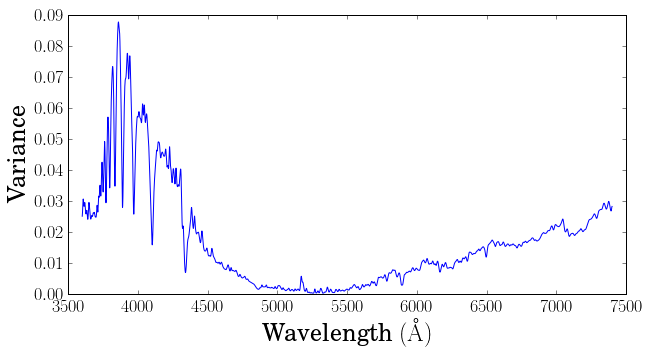

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel(r'Wavelength $(\mathrm{\AA})$')
ax.set_ylabel(r'Variance')
ax.plot(wave[wh], variances)

This is a VAST improvement over the same test with noisy SDSS spectra -- clearly identify informative regions. Jake suggests trying to use the [Mahalanobis metric](https://en.wikipedia.org/wiki/Mahalanobis_distance) to incorporate this information...